In [7]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



In [8]:
# Create a path to the csv and read it into a Pandas DataFrame
sleep_health_df = pd.read_csv('../Resources/cleaned_dataset.csv')
sleep_health_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Diagnosis,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Diagnosis,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [9]:
sleep_health_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

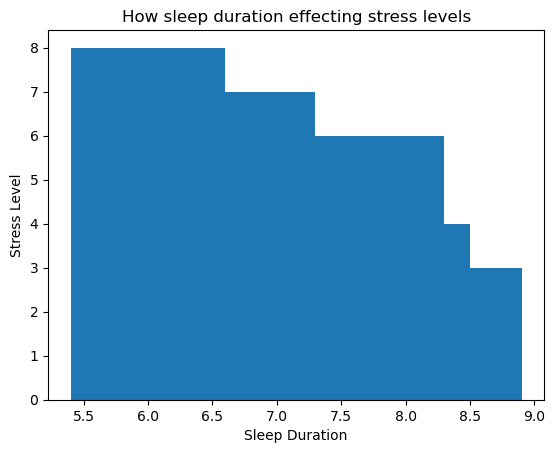

In [10]:
x_axis=sleep_health_df["Sleep Duration"]
y_axis=sleep_health_df["Stress Level"]
plt.bar(x_axis,y_axis)
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.title("How sleep duration effecting stress levels")
plt.show()


In [11]:
male_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Male')]
female_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Female')]

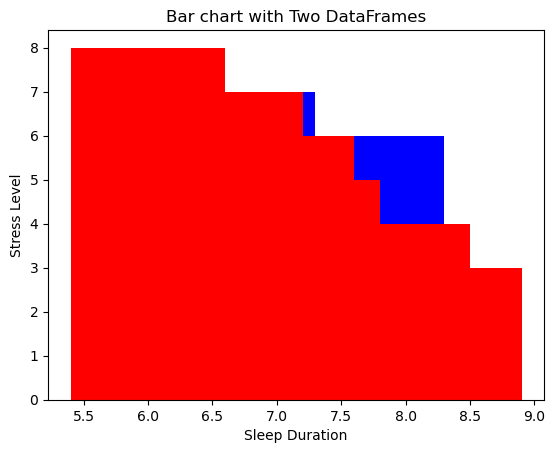

In [12]:

# bar plot for df1
plt.bar(male_df['Sleep Duration'], male_df['Stress Level'], color='blue')

# bar plot for df2
plt.bar(female_df['Sleep Duration'], female_df['Stress Level'], color='red')

# Labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Bar chart with Two DataFrames')


# Display the plot
plt.show()


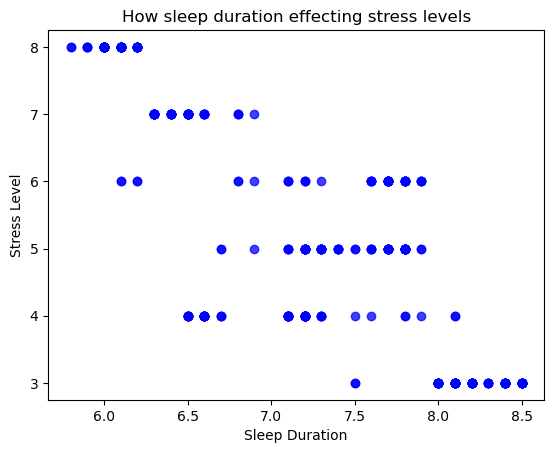

In [13]:
x_axis=sleep_health_df["Sleep Duration"]
y_axis=sleep_health_df["Stress Level"]
plt.scatter(x_axis,y_axis,color='b',marker='o',alpha=0.75)
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.title("How sleep duration effecting stress levels")
plt.show()

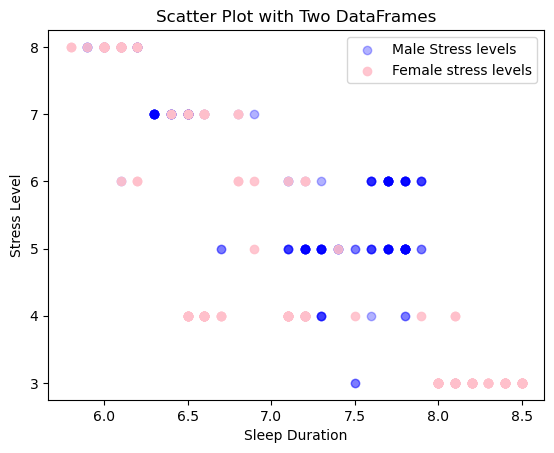

In [14]:
# Scatter plot for df1
plt.scatter(male_df['Sleep Duration'], male_df['Stress Level'], label='Male Stress levels', color='blue',alpha=0.3)

# Scatter plot for df2
plt.scatter(female_df['Sleep Duration'], female_df['Stress Level'], label='Female stress levels', color='pink',alpha=0.9)

# Labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Scatter Plot with Two DataFrames')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [15]:
stress_count_female=female_df['Stress Level'].unique()
stress_count_male=male_df['Stress Level'].unique()
stress_count_male

array([6, 8, 7, 3, 5, 4], dtype=int64)

In [122]:

def stress_level_category(row):
    'Stress Level'== row['Stress Level']
    if  'Stress Level' >= 7:
        return("Stressed Highly ")
    elif ('Stress Level' >= 4 and 'Stress Level' <= 6):
        return("Stressed Moderately")
    else:
        return("Stressed Low")


In [79]:
stress_string=[]

for row in sleep_health_df['Stress Level']:
    if  row >= 7:
        stress_string.append("Stressed Highly ")
    elif (row >= 4 and row <= 6):
        stress_string.append("Stressed Moderately")
    else:
        stress_string.append("Stressed Low")
sleep_health_df['Stress Level Category']=stress_string
print(sleep_health_df['Stress Level Category'])

0      Stressed Moderately
1         Stressed Highly 
2         Stressed Highly 
3         Stressed Highly 
4         Stressed Highly 
              ...         
369           Stressed Low
370           Stressed Low
371           Stressed Low
372           Stressed Low
373           Stressed Low
Name: Stress Level Category, Length: 374, dtype: object


In [123]:
sleep_health_df['Stress Level'] = pd.to_numeric(sleep_health_df['Stress Level'])
# sleep_health_df['Stress Level Category'] = sleep_health_df.apply(stress_level_category,axis=1)

numeric_columns = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Systolic', 'Diastolic']


In [97]:
mean_stress_male = male_df.groupby(['Stress Level'])[numeric_columns].mean()
mean_stress_female = female_df.groupby(['Stress Level'])[numeric_columns].mean()

# Merge mean stress levels for males and females into a single DataFrame
# stress_groups_df = pd.merge(mean_stress_male, mean_stress_female,on=sleep_health_df['Stress Level Category'],suffixes=[" Male", " Female"],how='left')
# stress_groups_df

In [112]:
def blood_pressure_level(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    if systolic > 180 or diastolic > 120:
        return "hypertension"
    elif (systolic >= 140 or diastolic >= 90):
        return "hypertension"
    elif (systolic >= 130 or diastolic >= 80):
        return "hypertension"
    elif (systolic < 130 and systolic >= 120) and (diastolic < 80):
        return "elevated"
    else:
        return "normal"
    
# sleep_health_df['Blood Pressure Category'] = sleep_health_df.apply(blood_pressure_level, axis=1)
# male_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Male')]
# female_df = sleep_health_df.loc[(sleep_health_df['Gender']=='Female')]
# numeric_columns = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','Systolic', 'Diastolic']
# male_bp_groups_df = male_df.groupby(['Blood Pressure Category'])[numeric_columns].mean().round(2)
# female_bp_groups_df = female_df.groupby(['Blood Pressure Category'])[numeric_columns].mean().round(2)

# bp_groups_df = pd.merge(male_bp_groups_df, female_bp_groups_df,on='Blood Pressure Category',suffixes=[" Male", " Female"],how='left')
# # bp_groups_df
print(blood_pressure_level)

<function blood_pressure_level at 0x000001D15087D480>


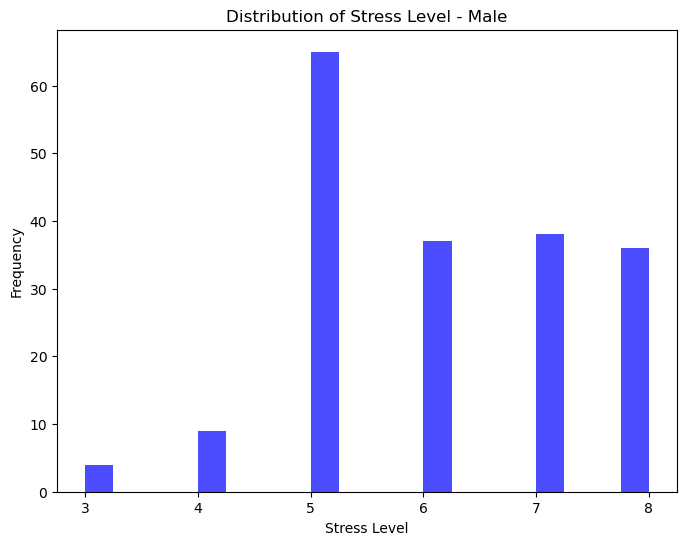

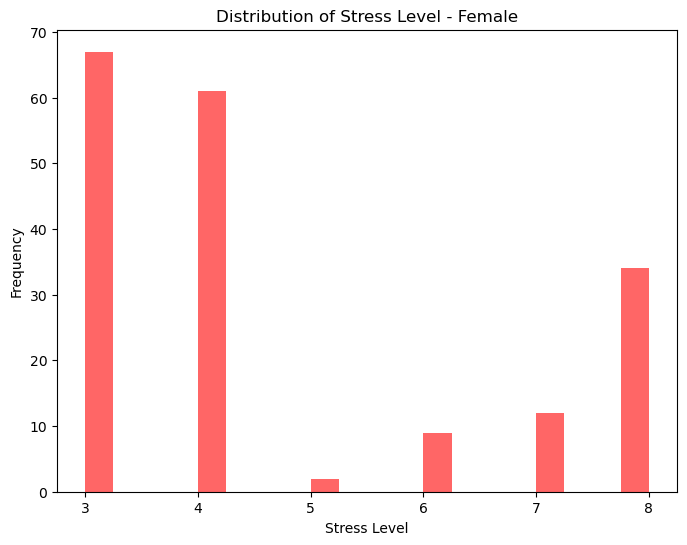

In [58]:
#Histogram for Stress Level - Male
plt.figure(figsize=(8, 6))
plt.hist(male_df['Stress Level'], bins=20, alpha=0.7, color='blue')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Distribution of Stress Level - Male')
plt.show()

# Histogram for Stress Level - Female
plt.figure(figsize=(8, 6))
plt.hist(female_df['Stress Level'], bins=20, alpha=0.6, color='red')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.title('Distribution of Stress Level - Female')
plt.show()

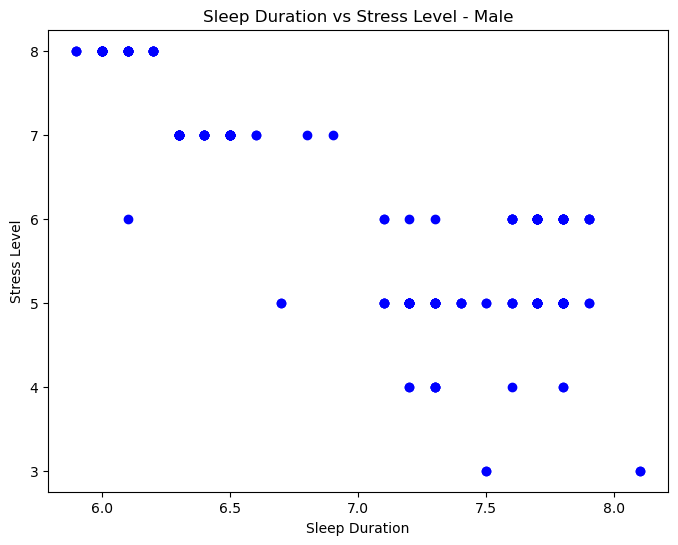

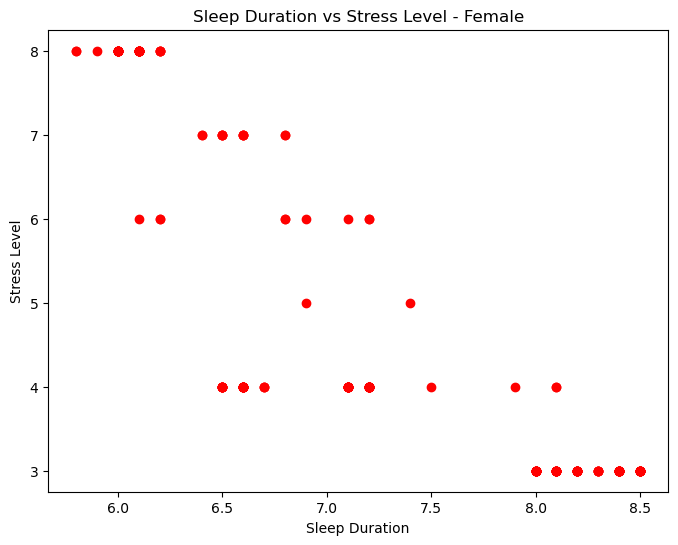

In [57]:
# Scatter plot: Sleep Duration vs Stress Level - Male
plt.figure(figsize=(8, 6))
plt.scatter(male_df['Sleep Duration'], male_df['Stress Level'], color='blue')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Sleep Duration vs Stress Level - Male')
plt.show()

# Scatter plot: Sleep Duration vs Stress Level - Female
plt.figure(figsize=(8, 6))
plt.scatter(female_df['Sleep Duration'], female_df['Stress Level'], color='red')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Sleep Duration vs Stress Level - Female')
plt.show()



In [25]:
mean_stress_male = male_df['Stress Level'].mean()
mean_stress_female = female_df['Stress Level'].mean()

# Create DataFrames for mean stress levels
male_mean_df = pd.DataFrame({'Stress Level': ['Male'], 'Mean Stress Level': [mean_stress_male]})
female_mean_df = pd.DataFrame({'Stress Level': ['Female'], 'Mean Stress Level': [mean_stress_female]})

# Merge mean stress levels for males and females into a single DataFrame
stress_groups_df = pd.concat([male_mean_df, female_mean_df], ignore_index=True)

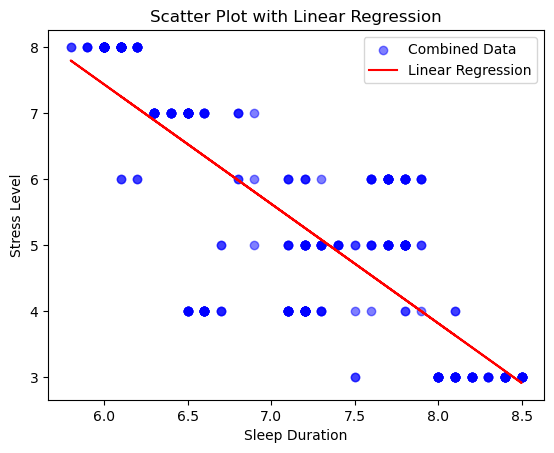

In [16]:
# Concatenate male and female DataFrames
combined_df = pd.concat([male_df, female_df])

# Extract features and target variable
X = combined_df[['Sleep Duration']]  
y = combined_df['Stress Level']  

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Scatter plot for the combined data points
plt.scatter(combined_df['Sleep Duration'], combined_df['Stress Level'], label='Combined Data', color='blue', alpha=0.5)

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Linear Regression')

# Labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Scatter Plot with Linear Regression')

# Show legend
plt.legend()

# Display the plot
plt.show()

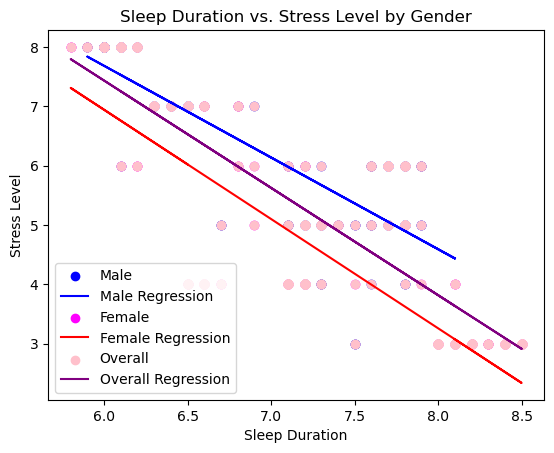

In [18]:
# Scatter plot for Male
plt.scatter(male_df['Sleep Duration'], male_df['Stress Level'], label='Male', color='blue')

# Fit linear regression for Male
model_male = LinearRegression()
X_male = male_df[['Sleep Duration']]
y_male = male_df['Stress Level']
model_male.fit(X_male, y_male)

# Plot linear regression line for Male
plt.plot(X_male, model_male.predict(X_male), color='blue', linestyle='-', label='Male Regression')
line_eq_male = f'y = {round(model_male.coef_[0], 2)}x + {round(model_male.intercept_, 2)}'
plt.annotate(line_eq_male, (40, 6.5), fontsize=15, color="blue")

# Scatter plot for Female
plt.scatter(female_df['Sleep Duration'], female_df['Stress Level'], label='Female', color='magenta')

# Fit linear regression for Female
model_female = LinearRegression()
X_female = female_df[['Sleep Duration']]
y_female = female_df['Stress Level']
model_female.fit(X_female, y_female)

# Plot linear regression line for Female
plt.plot(X_female, model_female.predict(X_female), color='red', linestyle='-', label='Female Regression')
line_eq_female = f'y = {round(model_female.coef_[0], 2)}x + {round(model_female.intercept_, 2)}'
plt.annotate(line_eq_female, (45, 8.5), fontsize=15, color="magenta")

# Scatter plot for Overall
plt.scatter(sleep_health_df['Sleep Duration'], sleep_health_df['Stress Level'], label='Overall', color='pink')

# Fit linear regression for Overall
model_overall = LinearRegression()
X_overall = sleep_health_df[['Sleep Duration']]
y_overall = sleep_health_df['Stress Level']
model_overall.fit(X_overall, y_overall)

# Plot linear regression line for Overall
plt.plot(X_overall, model_overall.predict(X_overall), color='purple', linestyle='-', label='Overall Regression')
line_eq_overall = f'y = {round(model_overall.coef_[0], 2)}x + {round(model_overall.intercept_, 2)}'
plt.annotate(line_eq_overall, (30, 7.5), fontsize=15, color="green")

# Labels, title, and display
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title('Sleep Duration vs. Stress Level by Gender')
plt.legend()

# Save an image
plt.savefig("../Images/sleep_vs_stress.png")
plt.show()

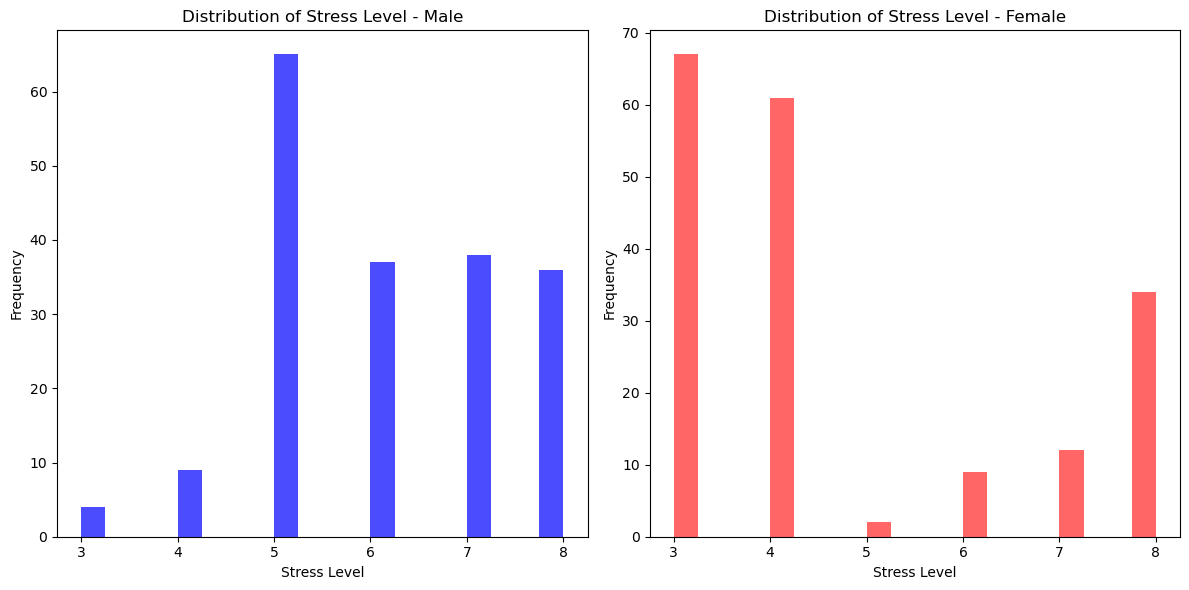

In [17]:
# Create subplots for side-by-side histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Stress Level - Male
axs[0].hist(male_df['Stress Level'], bins=20, alpha=0.7, color='blue')
axs[0].set_xlabel('Stress Level')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Stress Level - Male')

# Histogram for Stress Level - Female
axs[1].hist(female_df['Stress Level'], bins=20, alpha=0.6, color='red')
axs[1].set_xlabel('Stress Level')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Stress Level - Female')

# Adjust layout
plt.tight_layout()

# Save image
plt.savefig('../Images/stress_level_frequency.png')
plt.show()